In [10]:
xAll <- readLines("../data/list.allGenes.txt")
xFMRP <- readLines("../data/list.FMRP.txt")

allGeneList <- read.table("../data/FDR_scz2016_lof_maf001_damaging_maf001pi.0.07.txt", header = TRUE)

sAll <- allGeneList[, c("Gene", "qvalue")]

xResult <- as.character(head(sAll, 100)[, 1])
head(sAll)

Gene     qvalue
1 SETD1A 0.04336917
2  TAF13 0.04368166
3    MIF 0.05526800
4 ZDHHC5 0.06234066
5  KDM2B 0.07027756
6   RTTN 0.07736395

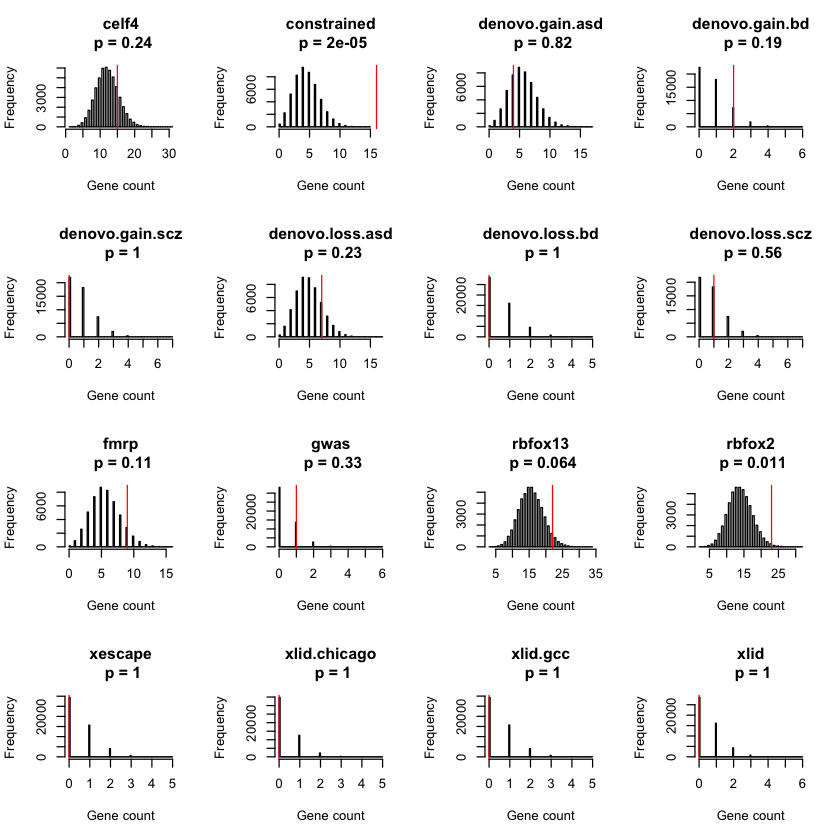

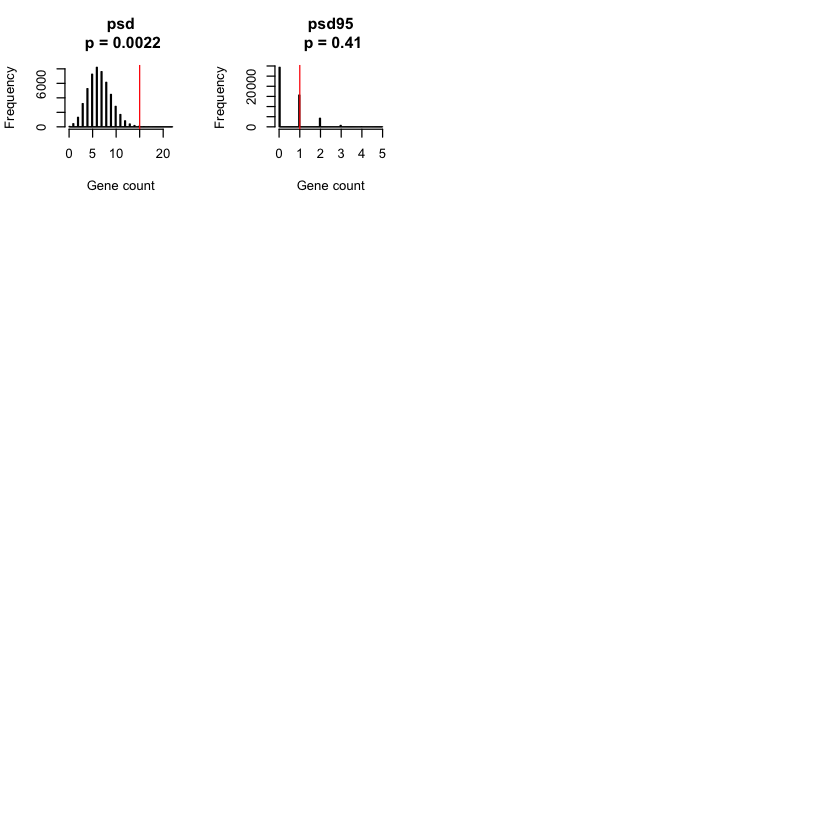

In [11]:
fileN <- c("celf4.txt", 
"constrained.txt", 
"denovo.gain.asd.txt", 
"denovo.gain.bd.txt", 
"denovo.gain.scz.txt", 
"denovo.loss.asd.txt", 
"denovo.loss.bd.txt", 
"denovo.loss.scz.txt", 
"fmrp.txt", 
"gwas.txt", 
"rbfox13.txt", 
"rbfox2.txt", 
"xescape.txt", 
"xlid.chicago.txt", 
"xlid.gcc.txt", 
"xlid.txt",
          "psd.txt", "psd95.txt")

pList <- NULL
nG <- NULL
lGeneSet <- NULL

pAllFDR <- NULL

par(mfrow = c(4, 4))
for (kk in 1:length(fileN)){
x1 <- read.table(paste("../data/genelists/genesListFromGuilio/", fileN[kk], sep = ""))
xFMRP <- as.character(x1[, 1])
xFMRP <- unique(xFMRP)
xFMRP <- intersect(xFMRP, xAll) ###Make sure they use the same symbols
l1 <- length(xFMRP)
lGeneSet[kk] <- l1
    
nSample <- 50000 ##Number of sampling from all genes
outList <- NULL

xIntersect <- length(intersect(xFMRP, xResult))
nG[kk] <- xIntersect
for (i in 1:nSample){
  tempGene <- sample(xAll, l1)
  outList[i] <- length(intersect(tempGene, xResult))
  
}

#plot(density(outList))
#abline(v = xIntersect)
pList[kk] <- (1 +  length(outList[outList >= xIntersect])) /(1 + nSample)

#    1- pnorm(xIntersect, mean(outList), sd = sd(outList))

    hist(outList, 100, main = paste(gsub(".txt", "", fileN[kk]), "\n p = ", signif(pList[kk], 2), sep = ""), 
         xlim = range(c(outList, xIntersect + 1)), xlab = "Gene count")
    abline(v = xIntersect, col = 'red')
    
    #########TEST all FDRs
    sAll$list108 <- rep(0, dim(sAll)[1])
xIndex <- pmatch(xFMRP, sAll$Gene)
xT <- cbind(xFMRP, xIndex)
xT <- xT[!is.na(xT[, 2]), ]

sAll[xT[, 2], 3] <- rep(1, dim(xT)[1])

pAllFDR[kk] <- wilcox.test(qvalue ~ as.factor(list108), data = sAll)$p.value
}


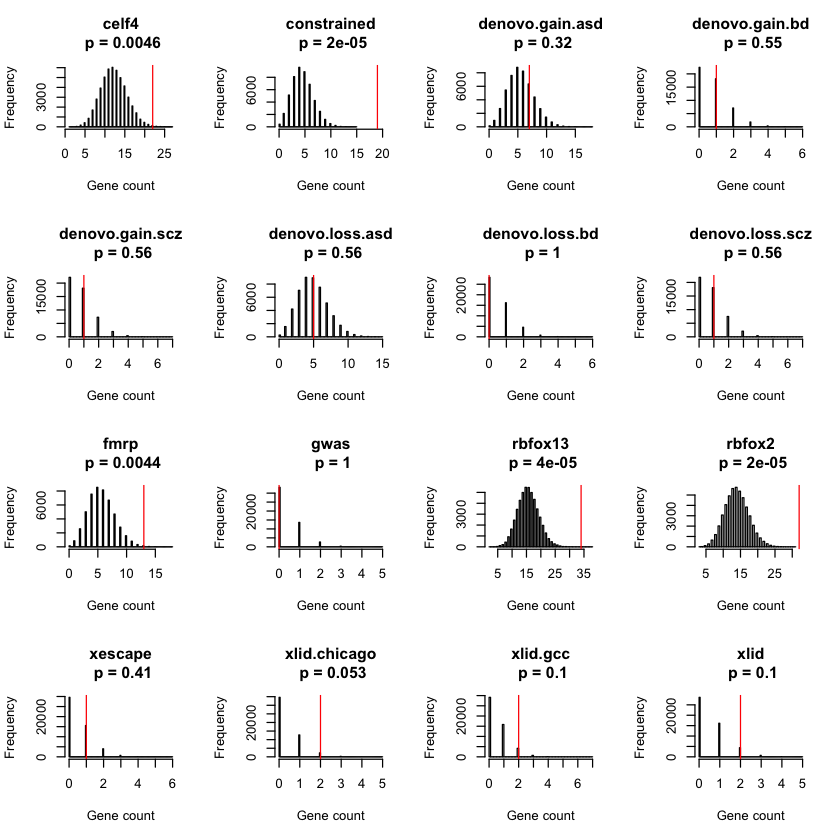

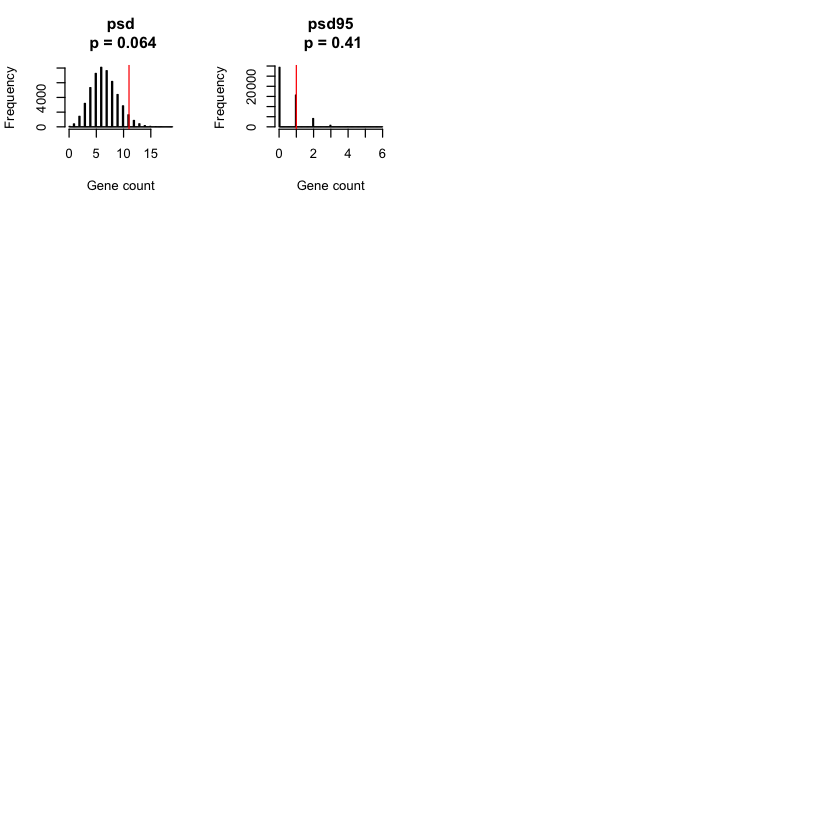

In [12]:
xAll <- readLines("../data/list.allGenes.txt")
xFMRP <- readLines("../data/list.FMRP.txt")

allGeneList <- read.table("../data/FDR_scz2016_Singleon_noexac_pi026.txt", header = TRUE)

sAll <- allGeneList[, c("Gene", "qvalue")]
xResult <- as.character(head(sAll, 100)[, 1])

fileN <- c("celf4.txt", 
"constrained.txt", 
"denovo.gain.asd.txt", 
"denovo.gain.bd.txt", 
"denovo.gain.scz.txt", 
"denovo.loss.asd.txt", 
"denovo.loss.bd.txt", 
"denovo.loss.scz.txt", 
"fmrp.txt", 
"gwas.txt", 
"rbfox13.txt", 
"rbfox2.txt", 
"xescape.txt", 
"xlid.chicago.txt", 
"xlid.gcc.txt", 
"xlid.txt",
          "psd.txt", "psd95.txt")

pList <- NULL
nG <- NULL
lGeneSet <- NULL

pAllFDR <- NULL



par(mfrow = c(4, 4))
for (kk in 1:length(fileN)){
x1 <- read.table(paste("../data/genelists/genesListFromGuilio/", fileN[kk], sep = ""))
xFMRP <- as.character(x1[, 1])
xFMRP <- unique(xFMRP)
xFMRP <- intersect(xFMRP, xAll) ###Make sure they use the same symbols
l1 <- length(xFMRP)
lGeneSet[kk] <- l1
    
nSample <- 50000 ##Number of sampling from all genes
outList <- NULL

xIntersect <- length(intersect(xFMRP, xResult))
nG[kk] <- xIntersect
for (i in 1:nSample){
  tempGene <- sample(xAll, l1)
  outList[i] <- length(intersect(tempGene, xResult))
  
}

#plot(density(outList))
#abline(v = xIntersect)
pList[kk] <- (1 +  length(outList[outList >= xIntersect])) /(1 + nSample)

#    1- pnorm(xIntersect, mean(outList), sd = sd(outList))

    hist(outList, 100, main = paste(gsub(".txt", "", fileN[kk]), "\n p = ", signif(pList[kk], 2), sep = ""), 
         xlim = range(c(outList, xIntersect + 1)), xlab = "Gene count")
    abline(v = xIntersect, col = 'red')
    
    #########TEST all FDRs
    sAll$list108 <- rep(0, dim(sAll)[1])
xIndex <- pmatch(xFMRP, sAll$Gene)
xT <- cbind(xFMRP, xIndex)
xT <- xT[!is.na(xT[, 2]), ]

sAll[xT[, 2], 3] <- rep(1, dim(xT)[1])

pAllFDR[kk] <- wilcox.test(qvalue ~ as.factor(list108), data = sAll)$p.value
}


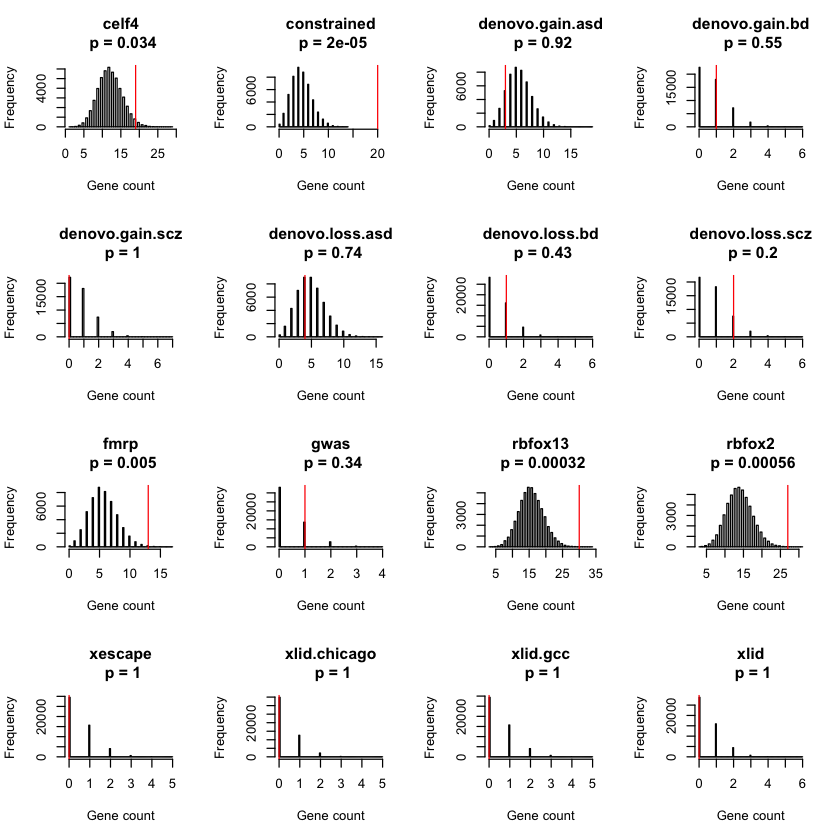

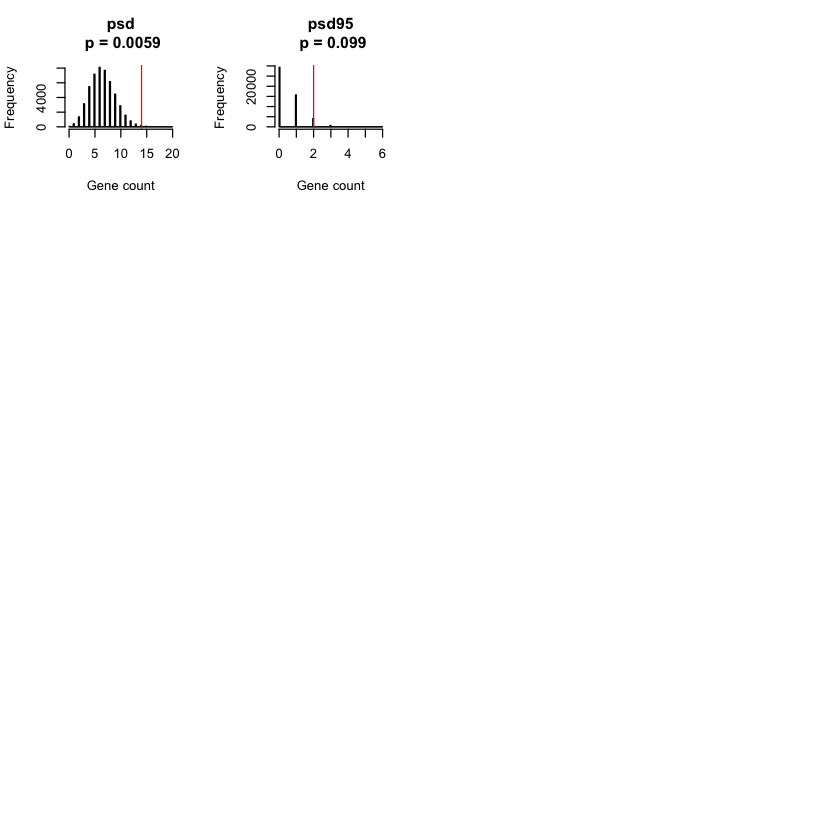

In [13]:

xAll <- readLines("../data/list.allGenes.txt")
xFMRP <- readLines("../data/list.FMRP.txt")

allGeneList <- read.table("../data/FDR_scz2016_april.lof_maf001_missense_maf001pi.0.03.notMissenseInEstimation.txt", header = TRUE)

sAll <- allGeneList[, c("Gene", "qvalue")]
xResult <- as.character(head(sAll, 100)[, 1])

fileN <- c("celf4.txt", 
"constrained.txt", 
"denovo.gain.asd.txt", 
"denovo.gain.bd.txt", 
"denovo.gain.scz.txt", 
"denovo.loss.asd.txt", 
"denovo.loss.bd.txt", 
"denovo.loss.scz.txt", 
"fmrp.txt", 
"gwas.txt", 
"rbfox13.txt", 
"rbfox2.txt", 
"xescape.txt", 
"xlid.chicago.txt", 
"xlid.gcc.txt", 
"xlid.txt",
          "psd.txt", "psd95.txt")

pList <- NULL
nG <- NULL
lGeneSet <- NULL

pAllFDR <- NULL

par(mfrow = c(4, 4))
for (kk in 1:length(fileN)){
x1 <- read.table(paste("../data/genelists/genesListFromGuilio/", fileN[kk], sep = ""))
xFMRP <- as.character(x1[, 1])
xFMRP <- unique(xFMRP)
xFMRP <- intersect(xFMRP, xAll) ###Make sure they use the same symbols
l1 <- length(xFMRP)
lGeneSet[kk] <- l1
    
nSample <- 50000 ##Number of sampling from all genes
outList <- NULL

xIntersect <- length(intersect(xFMRP, xResult))
nG[kk] <- xIntersect
for (i in 1:nSample){
  tempGene <- sample(xAll, l1)
  outList[i] <- length(intersect(tempGene, xResult))
  
}

#plot(density(outList))
#abline(v = xIntersect)
pList[kk] <- (1 +  length(outList[outList >= xIntersect])) /(1 + nSample)

#    1- pnorm(xIntersect, mean(outList), sd = sd(outList))

    hist(outList, 100, main = paste(gsub(".txt", "", fileN[kk]), "\n p = ", signif(pList[kk], 2), sep = ""), 
         xlim = range(c(outList, xIntersect + 1)), xlab = "Gene count")
    abline(v = xIntersect, col = 'red')
    
    #########TEST all FDRs
    sAll$list108 <- rep(0, dim(sAll)[1])
xIndex <- pmatch(xFMRP, sAll$Gene)
xT <- cbind(xFMRP, xIndex)
xT <- xT[!is.na(xT[, 2]), ]

sAll[xT[, 2], 3] <- rep(1, dim(xT)[1])

pAllFDR[kk] <- wilcox.test(qvalue ~ as.factor(list108), data = sAll)$p.value
}


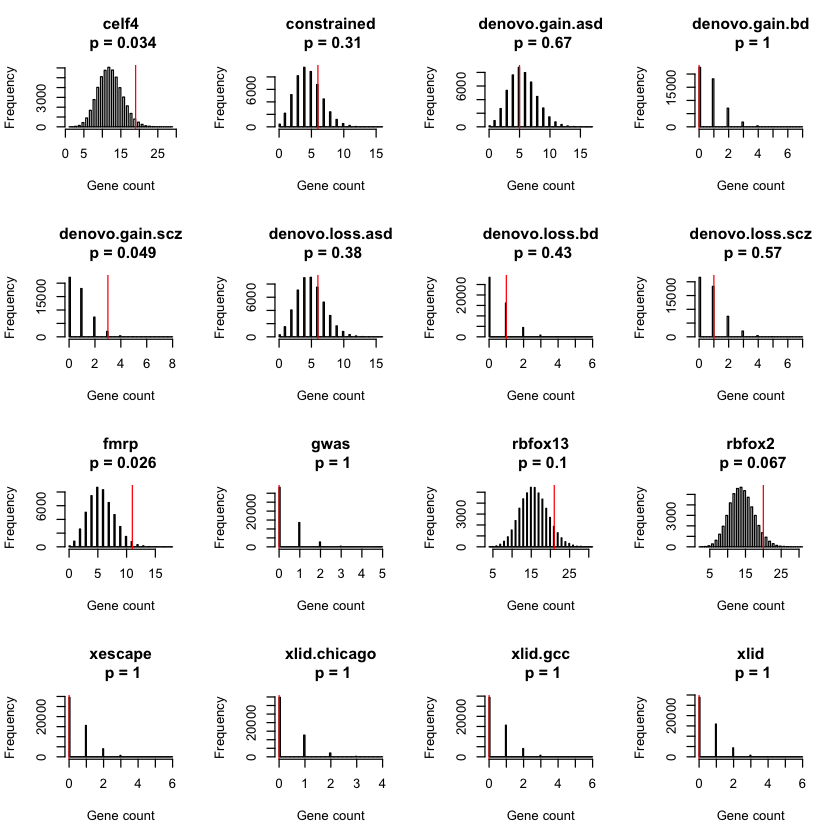

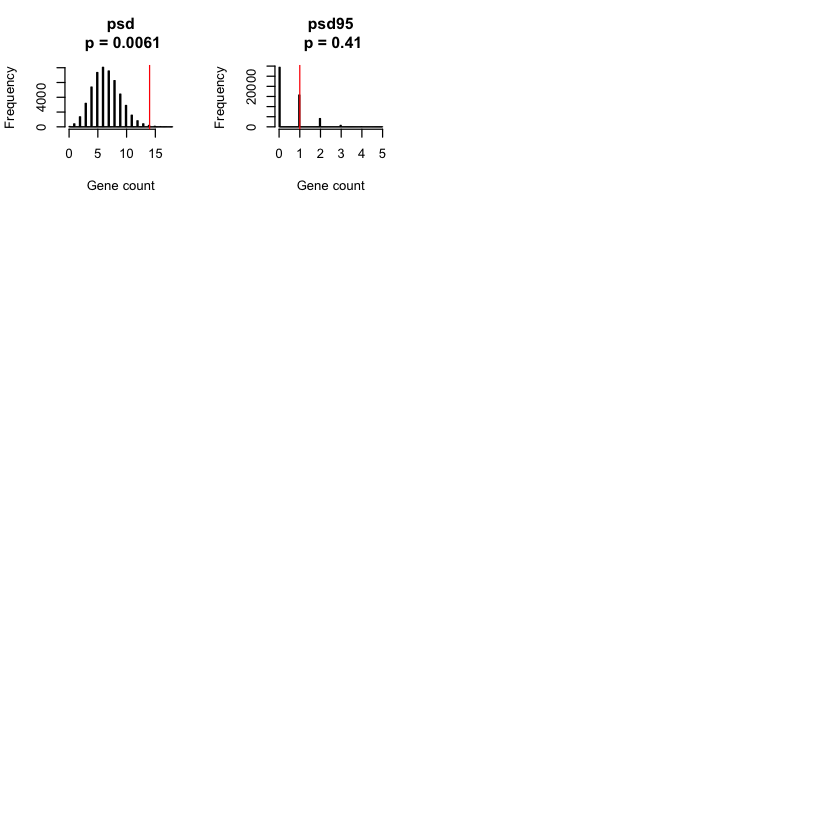

In [14]:

xAll <- readLines("../data/list.allGenes.txt")
xFMRP <- readLines("../data/list.FMRP.txt")

allGeneList <- read.table("../data/FDR_scz2016_april.lof_maf001_missense_maf001pi.0.27.txt", header = TRUE)

sAll <- allGeneList[, c("Gene", "qvalue")]
xResult <- as.character(head(sAll, 100)[, 1])

fileN <- c("celf4.txt", 
"constrained.txt", 
"denovo.gain.asd.txt", 
"denovo.gain.bd.txt", 
"denovo.gain.scz.txt", 
"denovo.loss.asd.txt", 
"denovo.loss.bd.txt", 
"denovo.loss.scz.txt", 
"fmrp.txt", 
"gwas.txt", 
"rbfox13.txt", 
"rbfox2.txt", 
"xescape.txt", 
"xlid.chicago.txt", 
"xlid.gcc.txt", 
"xlid.txt",
          "psd.txt", "psd95.txt")

pList <- NULL
nG <- NULL
lGeneSet <- NULL

pAllFDR <- NULL

par(mfrow = c(4, 4))
for (kk in 1:length(fileN)){
x1 <- read.table(paste("../data/genelists/genesListFromGuilio/", fileN[kk], sep = ""))
xFMRP <- as.character(x1[, 1])
xFMRP <- unique(xFMRP)
xFMRP <- intersect(xFMRP, xAll) ###Make sure they use the same symbols
l1 <- length(xFMRP)
lGeneSet[kk] <- l1
    
nSample <- 50000 ##Number of sampling from all genes
outList <- NULL

xIntersect <- length(intersect(xFMRP, xResult))
nG[kk] <- xIntersect
for (i in 1:nSample){
  tempGene <- sample(xAll, l1)
  outList[i] <- length(intersect(tempGene, xResult))
  
}

#plot(density(outList))
#abline(v = xIntersect)
pList[kk] <- (1 +  length(outList[outList >= xIntersect])) /(1 + nSample)

#    1- pnorm(xIntersect, mean(outList), sd = sd(outList))

    hist(outList, 100, main = paste(gsub(".txt", "", fileN[kk]), "\n p = ", signif(pList[kk], 2), sep = ""), 
         xlim = range(c(outList, xIntersect + 1)), xlab = "Gene count")
    abline(v = xIntersect, col = 'red')
    
    #########TEST all FDRs
    sAll$list108 <- rep(0, dim(sAll)[1])
xIndex <- pmatch(xFMRP, sAll$Gene)
xT <- cbind(xFMRP, xIndex)
xT <- xT[!is.na(xT[, 2]), ]

sAll[xT[, 2], 3] <- rep(1, dim(xT)[1])

pAllFDR[kk] <- wilcox.test(qvalue ~ as.factor(list108), data = sAll)$p.value
}


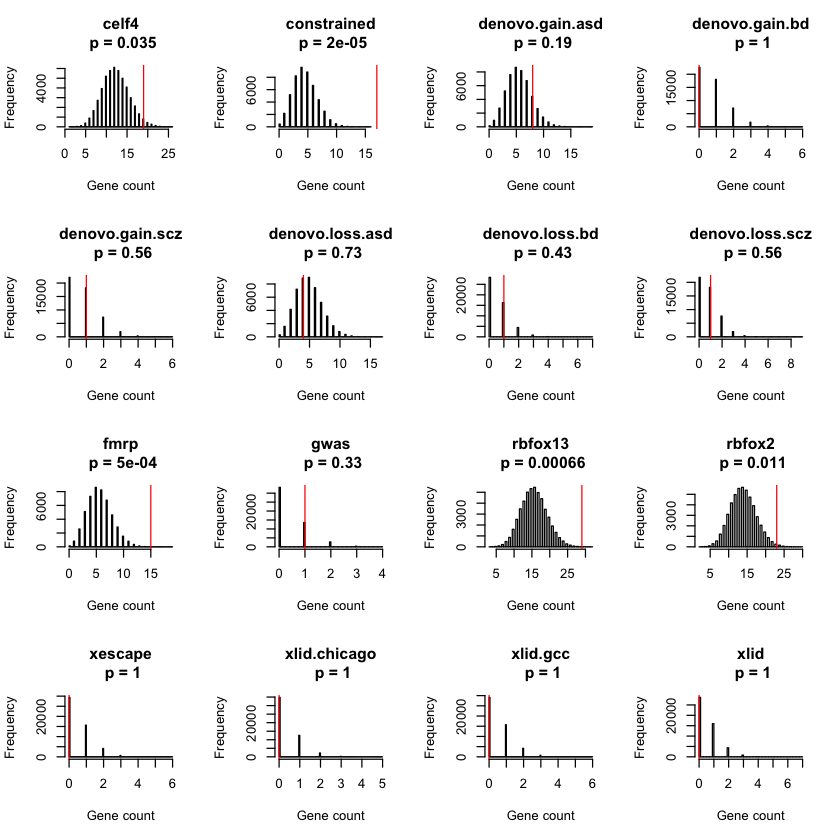

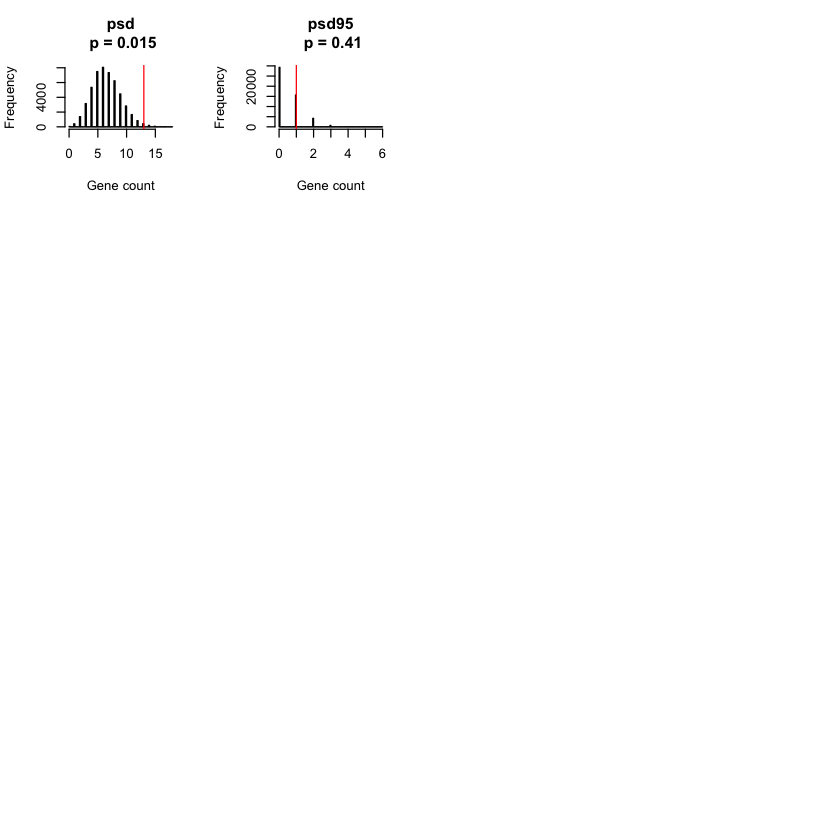

In [9]:

xAll <- readLines("../data/list.allGenes.txt")
xFMRP <- readLines("../data/list.FMRP.txt")

allGeneList <- read.table("../data/FDR_scz2016_denovo_and_transmittedData_pi034.txt", header = TRUE)

sAll <- allGeneList[, c("Gene", "qvalue")]
xResult <- as.character(head(sAll, 100)[, 1])

fileN <- c("celf4.txt", 
"constrained.txt", 
"denovo.gain.asd.txt", 
"denovo.gain.bd.txt", 
"denovo.gain.scz.txt", 
"denovo.loss.asd.txt", 
"denovo.loss.bd.txt", 
"denovo.loss.scz.txt", 
"fmrp.txt", 
"gwas.txt", 
"rbfox13.txt", 
"rbfox2.txt", 
"xescape.txt", 
"xlid.chicago.txt", 
"xlid.gcc.txt", 
"xlid.txt",
          "psd.txt", "psd95.txt")

pList <- NULL
nG <- NULL
lGeneSet <- NULL

pAllFDR <- NULL

par(mfrow = c(4, 4))
for (kk in 1:length(fileN)){
x1 <- read.table(paste("../data/genelists/genesListFromGuilio/", fileN[kk], sep = ""))
xFMRP <- as.character(x1[, 1])
xFMRP <- unique(xFMRP)
xFMRP <- intersect(xFMRP, xAll) ###Make sure they use the same symbols
l1 <- length(xFMRP)
lGeneSet[kk] <- l1
    
nSample <- 50000 ##Number of sampling from all genes
outList <- NULL

xIntersect <- length(intersect(xFMRP, xResult))
nG[kk] <- xIntersect
for (i in 1:nSample){
  tempGene <- sample(xAll, l1)
  outList[i] <- length(intersect(tempGene, xResult))
  
}

#plot(density(outList))
#abline(v = xIntersect)
pList[kk] <- (1 +  length(outList[outList >= xIntersect])) /(1 + nSample)

#    1- pnorm(xIntersect, mean(outList), sd = sd(outList))

    hist(outList, 100, main = paste(gsub(".txt", "", fileN[kk]), "\n p = ", signif(pList[kk], 2), sep = ""), 
         xlim = range(c(outList, xIntersect + 1)), xlab = "Gene count")
    abline(v = xIntersect, col = 'red')
    
    #########TEST all FDRs
    sAll$list108 <- rep(0, dim(sAll)[1])
xIndex <- pmatch(xFMRP, sAll$Gene)
xT <- cbind(xFMRP, xIndex)
xT <- xT[!is.na(xT[, 2]), ]

sAll[xT[, 2], 3] <- rep(1, dim(xT)[1])

pAllFDR[kk] <- wilcox.test(qvalue ~ as.factor(list108), data = sAll)$p.value
}



[1] 100

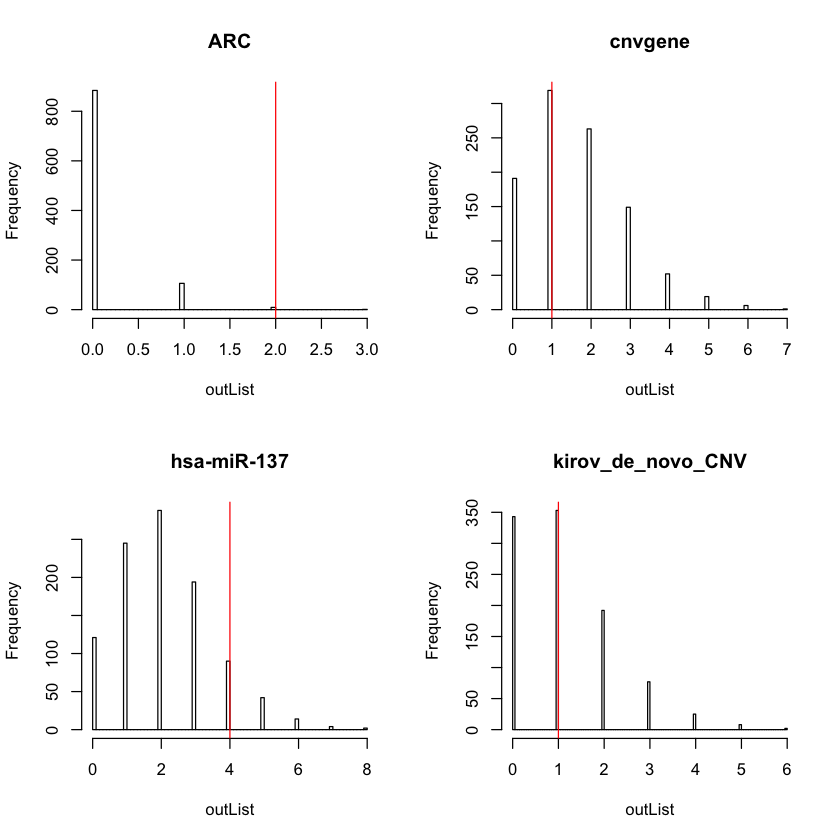

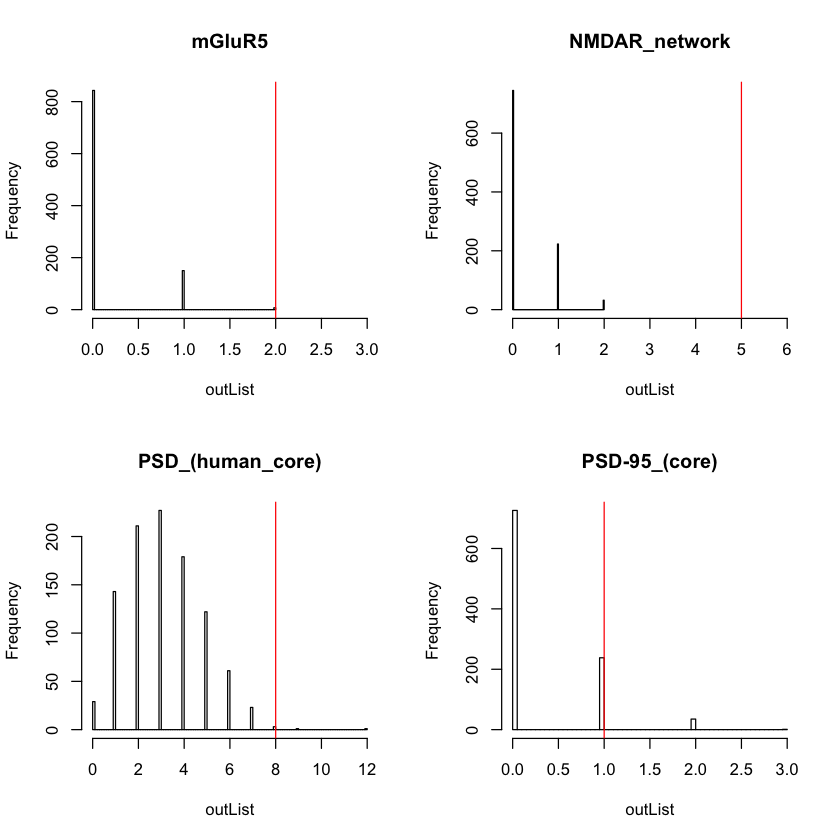

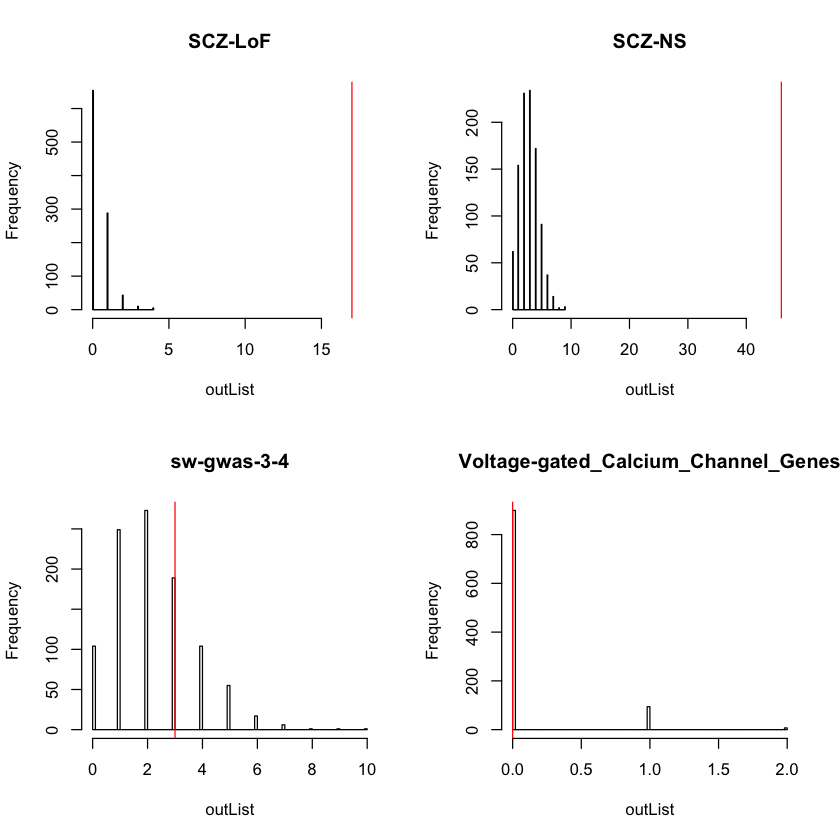

In [4]:
length(xResult)
allFile <- read.table("../data/genelists/purcell_swedex_sets/primary.set")

go1 <- split(allFile, allFile[, 2])

pList <- NULL
nameGeneSet <- NULL
nOverlappingGene <- NULL
lGeneSet <- NULL
pAllFDR <- NULL

par(mfrow = c(2, 2))
for (kk in 1:length(go1)){
#  x1 <- read.table(paste(dirF, "/", fileN[kk], sep = ""))
  x1 <- as.character(go1[[kk]][, 1])
#  xFMRP <- as.character(x1[, 1])
    xFMRP <- x1
  xFMRP <- unique(xFMRP)
  
  l1 <- length(xFMRP)
    lGeneSet[kk] <- l1
  nameGeneSet[kk] <- as.character(go1[[kk]][1, 2])
    
  nSample <- 1000 ##Number of sampling from all genes
  outList <- NULL
  
  xIntersect <- length(intersect(xFMRP, xResult))
  
    nOverlappingGene[kk] <- xIntersect
    
  for (i in 1:nSample){
    tempGene <- sample(xAll, l1)
    outList[i] <- length(intersect(tempGene, xResult))
    
  }
  pList[kk] <- (1 +  length(outList[outList >= xIntersect]) )/(nSample + 1)
    
       hist(outList, 100, main = nameGeneSet[kk], xlim = range(c(outList, xIntersect + 1)))
    abline(v = xIntersect, col = 'red')
    
       #########TEST all FDRs
    sAll$list108 <- rep(0, dim(sAll)[1])
xIndex <- pmatch(xFMRP, sAll$Gene)
xT <- cbind(xFMRP, xIndex)
xT <- xT[!is.na(xT[, 2]), ]

sAll[xT[, 2], 3] <- rep(1, dim(xT)[1])

pAllFDR[kk] <- wilcox.test(qvalue ~ as.factor(list108), data = sAll)$p.value
    
  
}


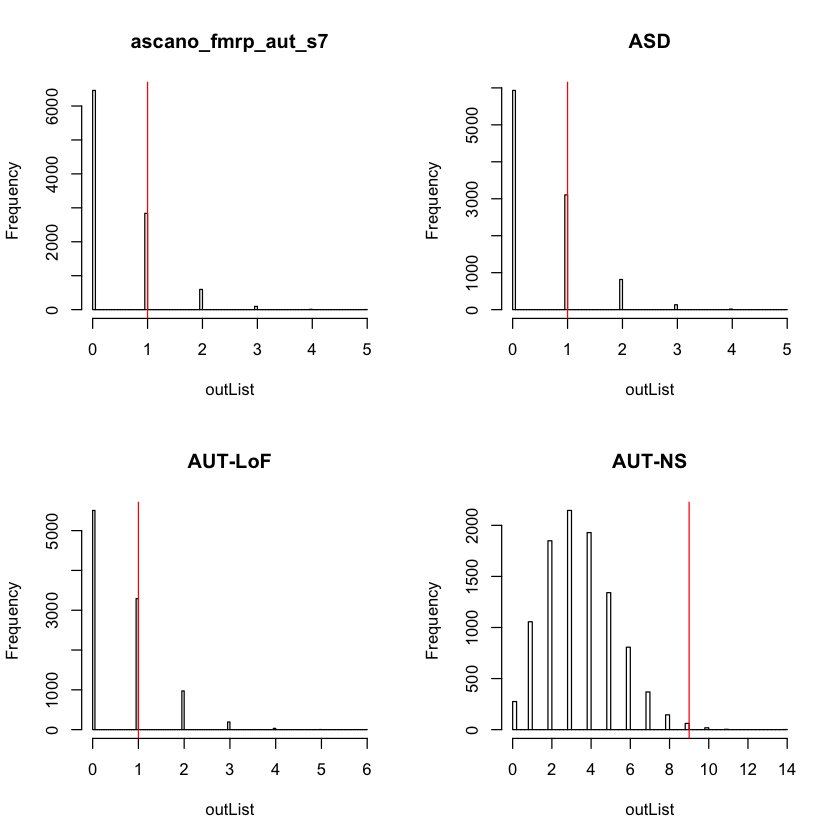

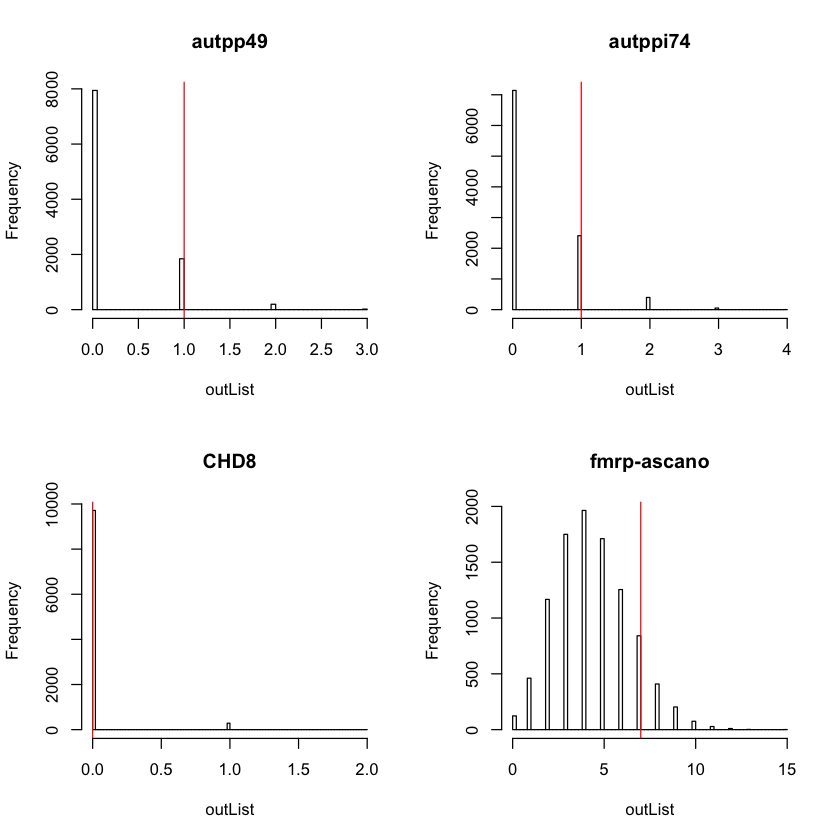

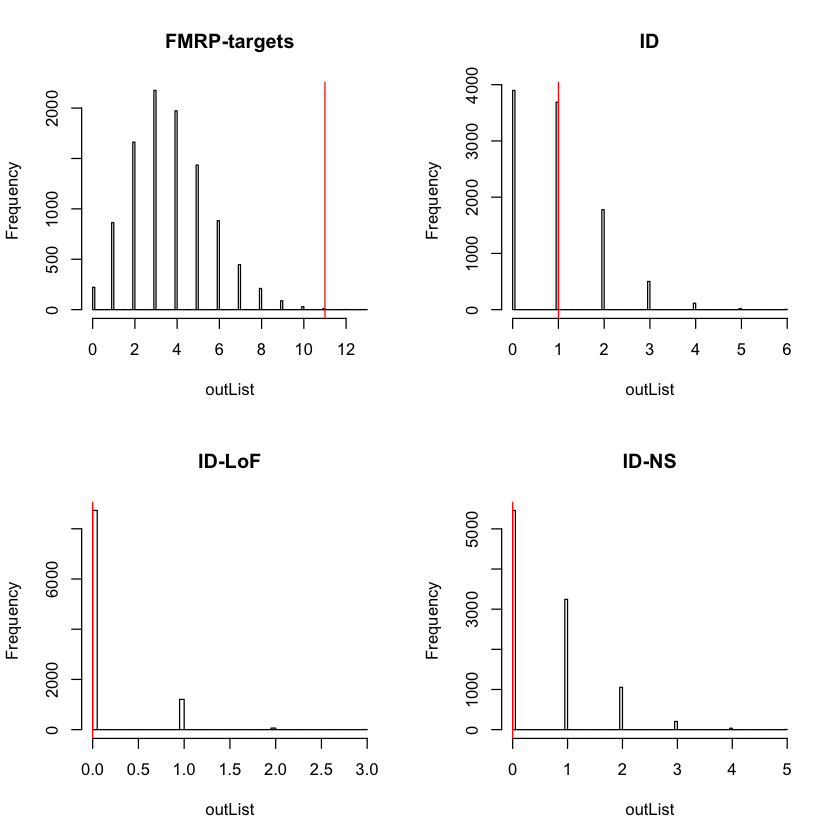

In [5]:
allFile <- read.table("../data/genelists/purcell_swedex_sets/secondary.set")

go1 <- split(allFile, allFile[, 2])
pList <- NULL
nameGeneSet <- NULL
nOverlappingGene <- NULL
lGeneSet <- NULL
pAllFDR <- NULL

par(mfrow = c(2, 2))
for (kk in 1:length(go1)){
#  x1 <- read.table(paste(dirF, "/", fileN[kk], sep = ""))
  x1 <- as.character(go1[[kk]][, 1])
#  xFMRP <- as.character(x1[, 1])
    xFMRP <- x1
  xFMRP <- unique(xFMRP)
  
  l1 <- length(xFMRP)
    lGeneSet[kk] <- l1
  nameGeneSet[kk] <- as.character(go1[[kk]][1, 2])
    
  nSample <- 10000 ##Number of sampling from all genes
  outList <- NULL
  
  xIntersect <- length(intersect(xFMRP, xResult))
  
    nOverlappingGene[kk] <- xIntersect
    
  for (i in 1:nSample){
    tempGene <- sample(xAll, l1)
    outList[i] <- length(intersect(tempGene, xResult))
    
  }
  pList[kk] <- (1 + length(outList[outList >= xIntersect]))/(nSample + 1)
    
       hist(outList, 100, main = nameGeneSet[kk], xlim = range(c(outList, xIntersect + 1)))
    abline(v = xIntersect, col = 'red')
           #########TEST all FDRs
    sAll$list108 <- rep(0, dim(sAll)[1])
xIndex <- pmatch(xFMRP, sAll$Gene)
xT <- cbind(xFMRP, xIndex)
xT <- xT[!is.na(xT[, 2]), ]

sAll[xT[, 2], 3] <- rep(1, dim(xT)[1])

pAllFDR[kk] <- wilcox.test(qvalue ~ as.factor(list108), data = sAll)$p.value
    
  
  
}


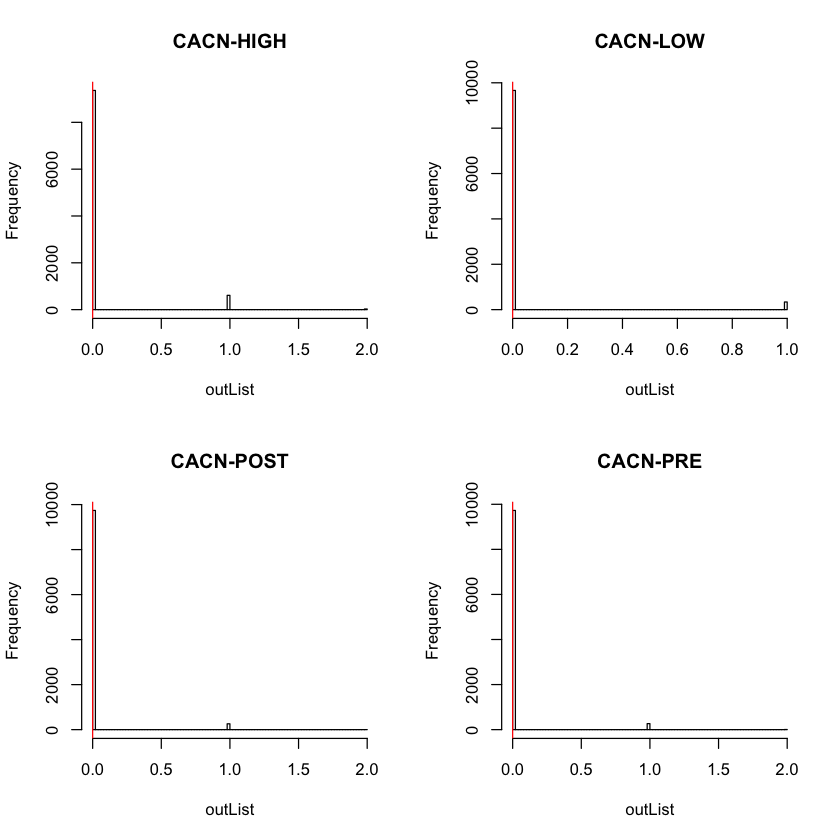

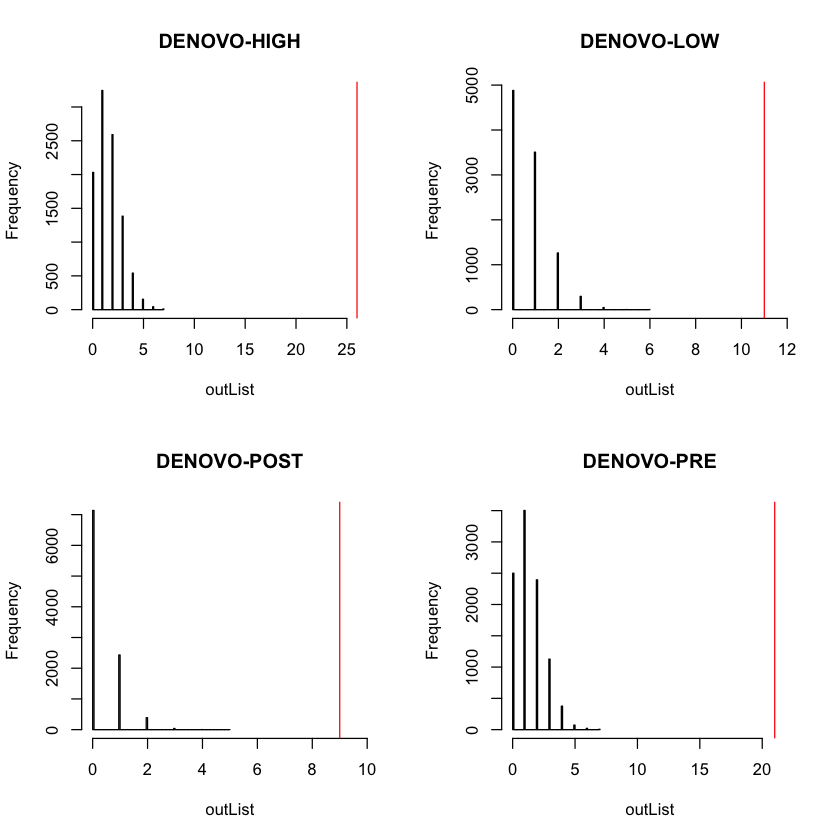

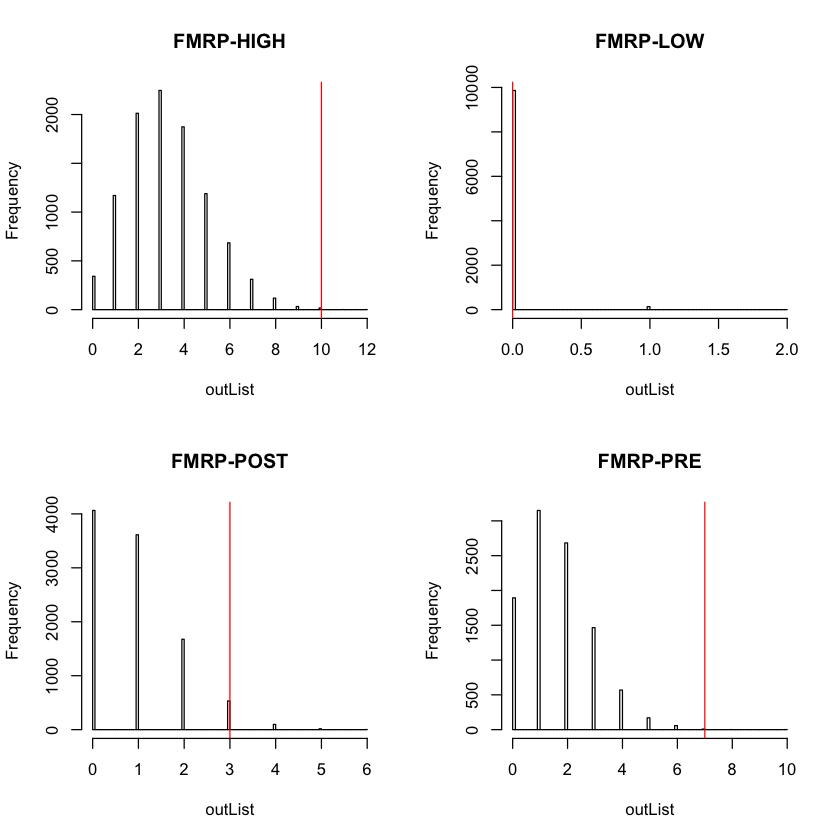

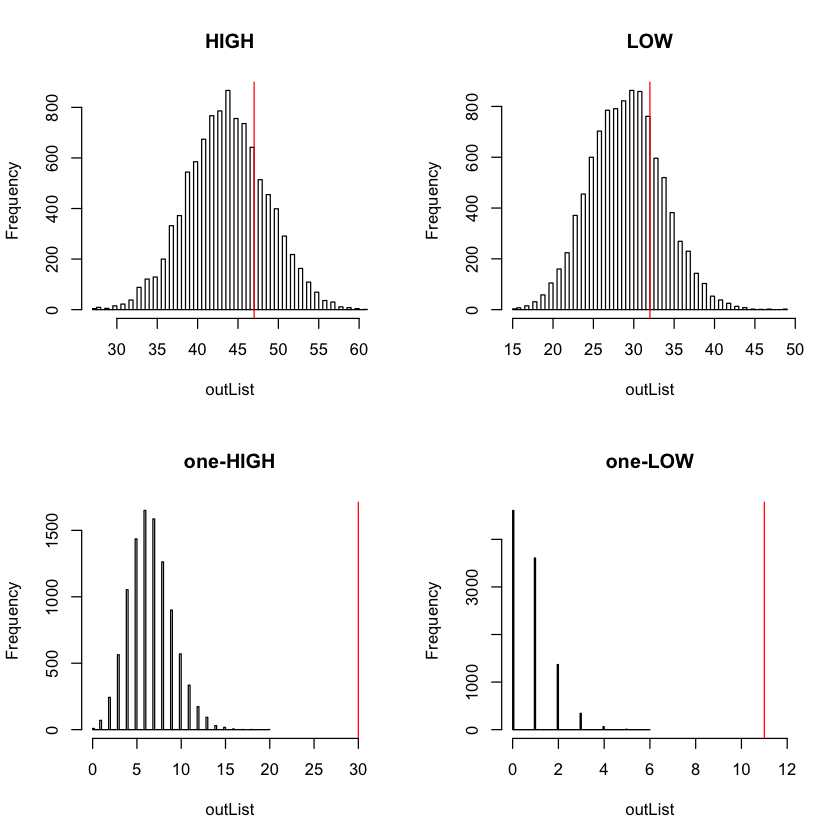

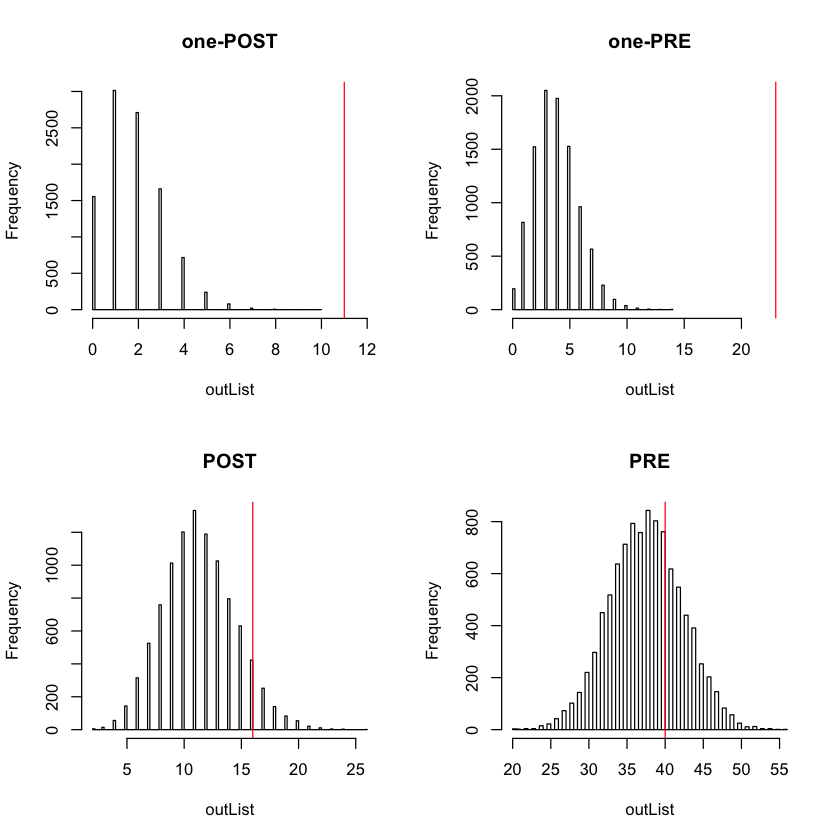

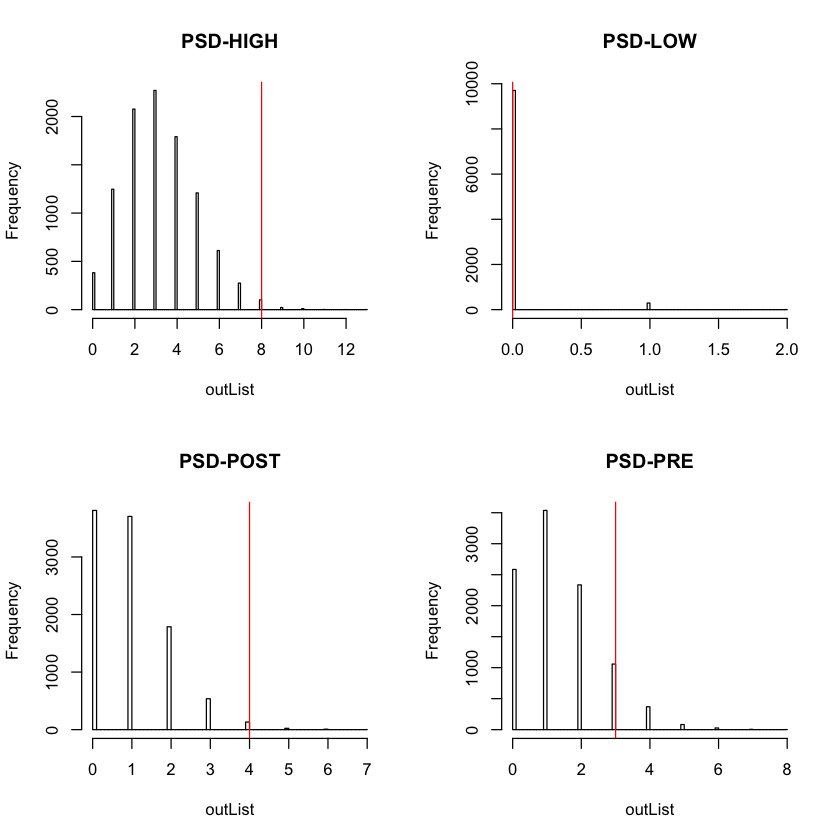

In [6]:
allFile <- read.table("../data/genelists/brainspan.set")


go1 <- split(allFile, allFile[, 2])
pList <- NULL
nameGeneSet <- NULL
nOverlappingGene <- NULL
lGeneSet <- NULL
pAllFDR <- NULL

par(mfrow = c(2, 2))
for (kk in 1:length(go1)){
#  x1 <- read.table(paste(dirF, "/", fileN[kk], sep = ""))
  x1 <- as.character(go1[[kk]][, 1])
#  xFMRP <- as.character(x1[, 1])
    xFMRP <- x1
  xFMRP <- unique(xFMRP)
  
  l1 <- length(xFMRP)
    lGeneSet[kk] <- l1
  nameGeneSet[kk] <- as.character(go1[[kk]][1, 2])
    
  nSample <- 10000 ##Number of sampling from all genes
  outList <- NULL
  
  xIntersect <- length(intersect(xFMRP, xResult))
  
    nOverlappingGene[kk] <- xIntersect
    
  for (i in 1:nSample){
    tempGene <- sample(xAll, l1)
    outList[i] <- length(intersect(tempGene, xResult))
    
  }
  pList[kk] <- (1 + length(outList[outList >= xIntersect]))/(nSample + 1)
    
       hist(outList, 100, main = nameGeneSet[kk], xlim = range(c(outList, xIntersect + 1)))
    abline(v = xIntersect, col = 'red')
           #########TEST all FDRs
    sAll$list108 <- rep(0, dim(sAll)[1])
xIndex <- pmatch(xFMRP, sAll$Gene)
xT <- cbind(xFMRP, xIndex)
xT <- xT[!is.na(xT[, 2]), ]

sAll[xT[, 2], 3] <- rep(1, dim(xT)[1])

pAllFDR[kk] <- wilcox.test(qvalue ~ as.factor(list108), data = sAll)$p.value
    
  
  
}


In [7]:
allFile <- read.table("../data/genelists/go.set.2columns", sep = " ")
go0 <- split(allFile, allFile[, 2])

NN = 10
c1 <- lapply(go1, function(x) dim(x)[1] )

#lapply(a, Filter, f = function(x) length(x) >= 3)
go1 <- go0[c1 >= NN]
length(go1)

pList <- NULL
nameGeneSet <- NULL
nOverlappingGene <- NULL
lGeneSet <- NULL
pAllFDR <- NULL
par(mfrow = c(2, 2))
for (kk in 1:length(go1)){
#  x1 <- read.table(paste(dirF, "/", fileN[kk], sep = ""))
  x1 <- as.character(go1[[kk]][, 1])
#  xFMRP <- as.character(x1[, 1])
    xFMRP <- x1
  xFMRP <- unique(xFMRP)
    tIndex <- pmatch(xFMRP, xAll)
    tIndex <- tIndex[!is.na(tIndex)]
    xFMRP <- xAll[tIndex]
  
  l1 <- length(xFMRP)
    lGeneSet[kk] <- l1
  nameGeneSet[kk] <- as.character(go1[[kk]][1, 2])
    
  nSample <- 1000 ##Number of sampling from all genes
  outList <- NULL
  
  xIntersect <- length(intersect(xFMRP, xResult))
  
    nOverlappingGene[kk] <- xIntersect
    
  for (i in 1:nSample){
    tempGene <- sample(xAll, l1)
    outList[i] <- length(intersect(tempGene, xResult))
    
  }
  pList[kk] <- (1 + length(outList[outList >= xIntersect]))/(nSample + 1)
    #1- pnorm(xIntersect, mean(outList), sd = sd(outList))
    
  #     hist(outList, 100, main = nameGeneSet[kk], xlim = range(c(outList, xIntersect + 1)))
   # abline(v = xIntersect, col = 'red')
    
             #########TEST all FDRs
    sAll$list108 <- rep(0, dim(sAll)[1])
xIndex <- pmatch(xFMRP, sAll$Gene)
   sAll$list108[xIndex] <- 1

        if (length(table(sAll$list108)) > 1)
            pAllFDR[kk] <- wilcox.test(qvalue ~ as.factor(list108), data = sAll)$p.value
    
  
}
outD <- cbind(nameGeneSet, pList, nOverlappingGene, lGeneSet, 100*round(nOverlappingGene/309, 4), pAllFDR)
colnames(outD) <- c("gene_set_name", "pValue", "nOverlappingGene", "GeneSetLength", "Overlapping Percentage", "pAllFDR")
outD[, 2] <- signif(as.numeric(outD[, 2]), 2)
outD[, 6] <- signif(as.numeric(outD[, 6]), 2)

outD <- outD[order(as.numeric(outD[, 2])), ]

    dim(outD[outD[, 2] < 0.05, ])
    
    

[1] 3004

[1] 89  6

In [8]:
outD[outD[, 2] < 0.05, ]

gene_set_name               pValue  nOverlappingGene GeneSetLength
 [1,] "adenyl"                    "0.001" "19"             "1503"       
 [2,] "binding"                   "0.001" "71"             "11746"      
 [3,] "myosin"                    "0.001" "4"              "80"         
 [4,] "non-membrane-bounded"      "0.001" "34"             "3788"       
 [5,] "nucleoside"                "0.001" "24"             "2628"       
 [6,] "nucleoside-triphosphatase" "0.001" "14"             "1205"       
 [7,] "nucleotide"                "0.001" "25"             "2648"       
 [8,] "pyrophosphatase"           "0.001" "11"             "804"        
 [9,] "motor"                     "0.002" "4"              "131"        
[10,] "myofibril"                 "0.002" "5"              "181"        
[11,] "prechordal"                "0.002" "1"              "1"          
[12,] "proline"                   "0.002" "2"              "12"         
[13,] "purine"                    "0.002" "20"             "2039"       
[14,] "ribonucleotide"            "0.002" "20"             "2008"       
[15,] "cellular_component"        "0.003" "89"             "16583"      
[16,] "cytoskeleton"              "0.003" "17"             "1769"       
[17,] "muscle"                    "0.003" "9"              "601"        
[18,] "ribonucleoside"            "0.003" "20"             "1977"       
[19,] "cargo"                     "0.004" "3"              "65"         
[20,] "contractile"               "0.004" "5"              "184"        
[21,] "anion"                     "0.005" "22"             "2583"       
[22,] "intracellular"             "0.005" "71"             "12563"      
[23,] "lactase"                   "0.005" "1"              "1"          
[24,] "1-pyrroline-5-carboxylate" "0.006" "1"              "1"          
[25,] "cell"                      "0.006" "80"             "14682"      
[26,] "I"                         "0.008" "3"              "97"         
[27,] "microfilament"             "0.008" "2"              "20"         
[28,] "adenylosuccinate"          "0.009" "1"              "2"          
[29,] "branched-chain"            "0.01"  "2"              "27"         
[30,] "perichromatin"             "0.01"  "1"              "3"          
[31,] "cytoskeletal"              "0.011" "13"             "1277"       
[32,] "FATZ"                      "0.011" "1"              "3"          
[33,] "gamma-tubulin"             "0.011" "2"              "32"         
[34,] "sarcomere"                 "0.011" "4"              "152"        
[35,] "hydrolase"                 "0.012" "19"             "2366"       
[36,] "transmission"              "0.012" "8"              "688"        
[37,] "zeta"                      "0.012" "1"              "2"          
[38,] "nonassociative"            "0.013" "1"              "3"          
[39,] "PR-DUB"                    "0.014" "1"              "2"          
[40,] "small"                     "0.014" "33"             "4811"       
[41,] "actin-myosin"              "0.015" "2"              "37"         
[42,] "structural"                "0.015" "7"              "616"        
[43,] "macromolecular"            "0.016" "30"             "4309"       
[44,] "hatching"                  "0.018" "1"              "4"          
[45,] "hindlimb"                  "0.018" "2"              "40"         
[46,] "microspike"                "0.019" "1"              "3"          
[47,] "stereocilia"               "0.019" "1"              "4"          
[48,] "low-density"               "0.02"  "2"              "45"         
[49,] "GKAP/Homer"                "0.021" "1"              "4"          
[50,] "heterocyclic"              "0.021" "34"             "5278"       
[51,] "organelle"                 "0.021" "60"             "10567"      
[52,] "paraspeckles"              "0.022" "1"              "6"          
[53,] "actin-mediated"            "0.023" "2"              "44"         
[54,] "anchoring"                 "0.023" "4"              "225"